In [55]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
iris = load_iris()
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<AxesSubplot:ylabel='target'>

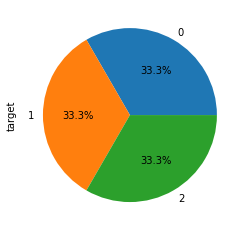

In [59]:
df.target.value_counts().plot.pie(autopct='%.1f%%')

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px

In [61]:
X = df.iloc[:,:-1]
y = df.target

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=.2, random_state=1)
clf1 =  GaussianNB()
clf2 = KNeighborsClassifier()
clf1.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)
ypred1 = clf1.predict(X)
ypred2 = clf2.predict(X)
print("confusion matrix clf1")
print(confusion_matrix(y, ypred1))
print(classification_report(y,ypred1))
print('-'*25)
print("confusion matrix clf2")
print(confusion_matrix(y, ypred2))
print(classification_report(y,ypred2))

confusion matrix clf1
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

-------------------------
confusion matrix clf2
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:ylabel='Purchased'>

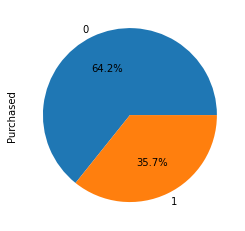

In [64]:
df.Purchased.value_counts().plot.pie(autopct='%.1f%%')

In [65]:
X= df[['Age','EstimatedSalary']]
y= df['Purchased']

In [66]:
from imblearn.over_sampling import SMOTE,SMOTEN,SVMSMOTE

In [67]:
sm = [SMOTE(),SMOTEN(),SVMSMOTE()]
X1,y1 =sm[0].fit_resample(X,y)
X2,y2 =sm[1].fit_resample(X,y)
X3,y3 =sm[2].fit_resample(X,y)

In [68]:
import matplotlib.pyplot as plt

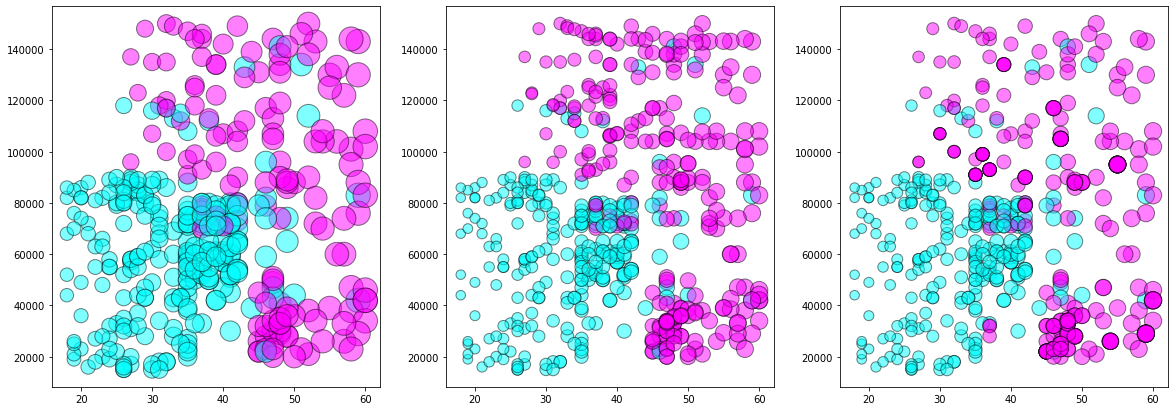

In [69]:
fig, ax = plt.subplots(1,3,figsize=(20,7))
ax[0].scatter(X.Age,X.EstimatedSalary,c=y,s=X.Age*10,cmap='cool',edgecolor='black',alpha=.5)
ax[1].scatter(X1.Age,X1.EstimatedSalary,c=y1,s=X1.Age*5,cmap='cool',edgecolor='black',alpha=.5)
ax[2].scatter(X2.Age,X2.EstimatedSalary,c=y2,s=X2.Age*5,cmap='cool',edgecolor='black',alpha=.5)
plt.show()

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,random_state=1234)
m= LogisticRegression()
m.fit(xtrain,ytrain)
ypred = m.predict(xtest)
cm= confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))

[[46  7]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        53
           1       0.75      0.78      0.76        27

    accuracy                           0.84        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.84      0.84      0.84        80



In [72]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X2)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y2,test_size=.2,random_state=1234)
m= LogisticRegression()
m.fit(xtrain,ytrain)
ypred = m.predict(xtest)
cm= confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))

[[36 11]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        47
           1       0.82      0.88      0.84        56

    accuracy                           0.83       103
   macro avg       0.83      0.82      0.82       103
weighted avg       0.83      0.83      0.82       103



In [73]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X3)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y3,test_size=.2,random_state=1234)
m= LogisticRegression()
m.fit(xtrain,ytrain)
ypred = m.predict(xtest)
cm= confusion_matrix(ytest,ypred)
print(cm)
print(classification_report(ytest,ypred))

[[34 13]
 [10 46]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75        47
           1       0.78      0.82      0.80        56

    accuracy                           0.78       103
   macro avg       0.78      0.77      0.77       103
weighted avg       0.78      0.78      0.78       103



In [74]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X3)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y3,test_size=.2,random_state=1234)
m=LogisticRegression()
m.fit(xtrain,ytrain)
ypred = m.predict(xtest)
cn = confusion_matrix(ytest,ypred)
print(cn)
print(classification_report(ytest,ypred))

[[34 13]
 [10 46]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.75        47
           1       0.78      0.82      0.80        56

    accuracy                           0.78       103
   macro avg       0.78      0.77      0.77       103
weighted avg       0.78      0.78      0.78       103



In [75]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y,test_size=.2,random_state=1234)
m = KNeighborsClassifier(n_neighbors=9)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[47  6]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        53
           1       0.80      0.89      0.84        27

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



In [76]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X1)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y1,test_size=.2,random_state=1234)
m = KNeighborsClassifier(n_neighbors=9)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[41  6]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        47
           1       0.90      0.93      0.91        56

    accuracy                           0.90       103
   macro avg       0.90      0.90      0.90       103
weighted avg       0.90      0.90      0.90       103



In [77]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X2)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y2,test_size=.2,random_state=1234)
m = KNeighborsClassifier(n_neighbors=9)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[41  6]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        47
           1       0.89      0.88      0.88        56

    accuracy                           0.87       103
   macro avg       0.87      0.87      0.87       103
weighted avg       0.87      0.87      0.87       103



In [78]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X3)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y3,test_size=.2,random_state=1234)
m = KNeighborsClassifier(n_neighbors=9)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[40  7]
 [ 5 51]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.88      0.91      0.89        56

    accuracy                           0.88       103
   macro avg       0.88      0.88      0.88       103
weighted avg       0.88      0.88      0.88       103



In [79]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y,test_size=.2,random_state=1234)
m = DecisionTreeRegressor(max_depth=15)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[44  9]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.71      0.81      0.76        27

    accuracy                           0.82        80
   macro avg       0.80      0.82      0.81        80
weighted avg       0.83      0.82      0.83        80



In [80]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X1)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y1,test_size=.2,random_state=1234)
m = DecisionTreeRegressor(max_depth=15)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[37 10]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        47
           1       0.83      0.88      0.85        56

    accuracy                           0.83       103
   macro avg       0.84      0.83      0.83       103
weighted avg       0.84      0.83      0.83       103



In [81]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X2)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y2,test_size=.2,random_state=1234)
m = DecisionTreeRegressor(max_depth=15)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[36 11]
 [10 46]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        47
           1       0.81      0.82      0.81        56

    accuracy                           0.80       103
   macro avg       0.79      0.79      0.79       103
weighted avg       0.80      0.80      0.80       103



In [83]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X3)
xtrain,xtest,ytrain,ytest = train_test_split(scaledX,y3,test_size=.2,random_state=1234)
m = DecisionTreeRegressor(max_depth=15)
m.fit(xtrain, ytrain)
ypred = m.predict(xtest)
cm = confusion_matrix(ytest, ypred)
print(cm)
print(classification_report(ytest,ypred))

[[39  8]
 [ 9 47]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.85      0.84      0.85        56

    accuracy                           0.83       103
   macro avg       0.83      0.83      0.83       103
weighted avg       0.84      0.83      0.84       103



In [84]:
from joblib import dump

In [85]:
model_dict={
    'title':'classification model for ad click prediction',
    'classifier':m,
    'scaler':scaler,
}

dump(model_dict, "clf_ap.pkl")

['clf_ap.pkl']